In [2]:
import matplotlib.pyplot as plt
import numpy as np

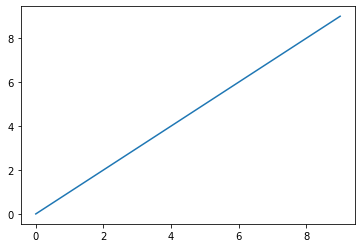

In [3]:
# 用 plot 画折线图
data = np.arange(10)
plt.plot(data)

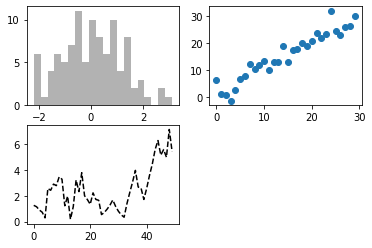

In [4]:
# Figure和Subplot
fig = plt.figure()
# 图像应该是2×2的（即最多4张图），编号从 1 开始
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# 在最近的 subplot 上画图
plt.plot(np.random.randn(50).cumsum(), 'k--')
# 
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

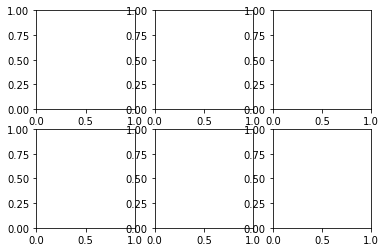

In [5]:
# 用 plt.subplots 创建包含subplot网格的figure
# 2 * 3 共六套图
fig, axes = plt.subplots(2, 3)

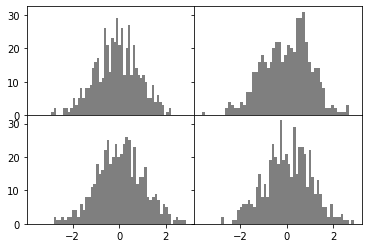

In [6]:
# 调整subplot周围的间距
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [8]:
# 颜色、标记和线型
# ax.plot(x, y, 'g--') # ==》 等价于
# ax.plot(x, y, linestyle='--', color='g')

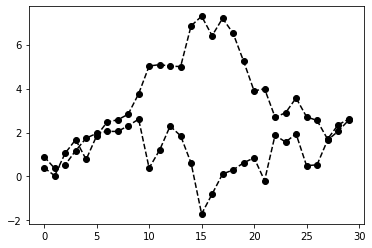

In [14]:
# 线图可以使用标记强调数据点
plt.plot(np.random.randn(30).cumsum(), 'ko--')
# 等价于
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

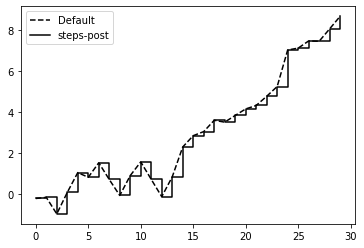

In [16]:
# 插值：默认是线性差值，可通过 drawstyle 进行修改
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

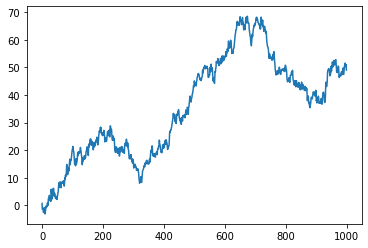

In [17]:
# 刻度、标签和图例
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'My first matplotlib plot')]

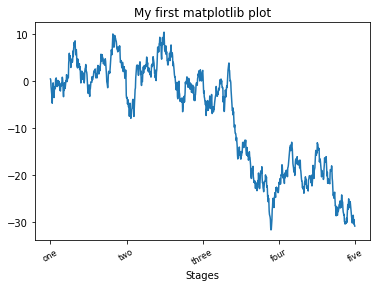

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
# 改变刻度
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

# 设置标题和 x 名称
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

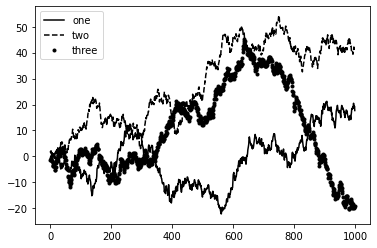

In [21]:
# 添加图例（legend）
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

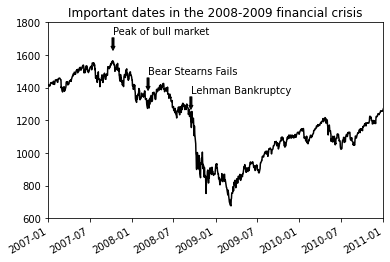

In [25]:
# 注释以及在Subplot上绘图
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')